## Gradient Descent Method

Gradient Descent is a fundamental optimization algorithm used in machine learning to minimize a function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. It is commonly used in training a wide range of machine learning models, most notably in neural networks.

### Basic Concept
The core idea behind Gradient Descent is to iteratively adjust parameters of a model to minimize a cost function, which measures the difference between the model's prediction and the actual data. The process involves the following steps:

1. Initialization: Start with initial parameter values. These can be set randomly or by some heuristic.

2. Compute the Gradient: Calculate the gradient of the cost function with respect to each parameter. The gradient is a vector that points in the direction of the steepest ascent of the cost function.

3. Update the Parameters: Adjust the parameters in the opposite direction of the gradient. This step is where the learning happens. The size of the step is determined by the learning rate, a hyperparameter that influences the speed and stability of the learning process.

4. Repeat: Repeat the process until the cost function converges to a minimum value.

## Challenges and Solutions
1. Choosing a Learning Rate: If the learning rate is too high, the algorithm might overshoot the minimum. If it's too low, the algorithm can be slow to converge or get stuck in local minima.

Solutions include using adaptive learning rate techniques like AdaGrad, RMSProp, or Adam, which adjust the learning rate during training.

2. Local Minima and Saddle Points: Especially in complex models like deep neural networks, Gradient Descent can get stuck in local minima or saddle points.

Modern neural networks often employ techniques like momentum, which helps the algorithm to continue to move in the right direction even when it reaches a plateau or a shallow local minimum.

### Importance in Machine Learning
Gradient Descent is crucial in machine learning because it provides a computationally efficient method to train models, particularly when the dataset is large or the model is complex. Its principles are foundational in understanding how many machine learning algorithms, particularly neural networks, are trained and optimized.

## Application

In [132]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Read the USA_Housing dataset into a pandas DataFrame object
df = pd.read_csv("USA_Housing.csv")


In [133]:
df.iloc[:100]

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
95,73698.696357,6.372731,6.578352,4.33,51815.096419,1.840236e+06,"69600 Wilson Rue\nElizabethland, PW 17767-2884"
96,66263.910501,6.374930,6.736974,4.41,49829.951500,1.441422e+06,"001 Steve Plaza\nJessicastad, UT 25190"
97,75394.759582,6.933352,7.834100,4.48,22268.075306,1.498641e+06,"238 Anthony Drive\nAcostahaven, AS 62753-6637"
98,65984.750645,6.512270,6.316480,2.38,21867.476940,9.547466e+05,"01818 Wilson Spurs\nWest Andreaton, SD 69568-7005"


In [136]:
X=df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
      'Avg. Area Number of Bedrooms', 'Area Population']]
Y=df['Price']

In [137]:
X = np.hstack((X, np.ones((X.shape[0], 1))))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Scaling the features
scaler = StandardScaler()
X_train[:, :-1] = scaler.fit_transform(X_train[:, :-1])
X_test[:, :-1] = scaler.transform(X_test[:, :-1])

# Gradient Descent function
def gd(X, Y, para, alpha, num):
    n = X.shape[0]
    MSE_hist = []
    
    for i in range(num):
        Y_hat = np.dot(X, para)
        res = Y - Y_hat
        grad = -2 / n * np.dot(X.T, res)
        para = para - alpha * grad
        MSE = np.mean(res ** 2)
        MSE_hist.append(MSE)
    return para, MSE_hist

# Initialize parameters
Start_para = np.random.randn(X.shape[1])
alpha = 0.01
num = 100
para, MSE_hist = gd(X_train, Y_train, Start_para, alpha, num)

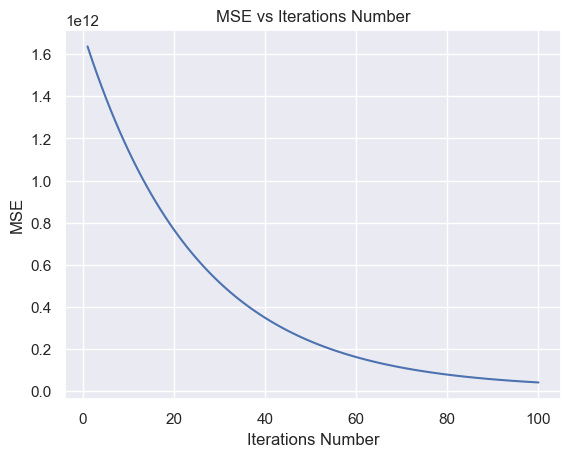

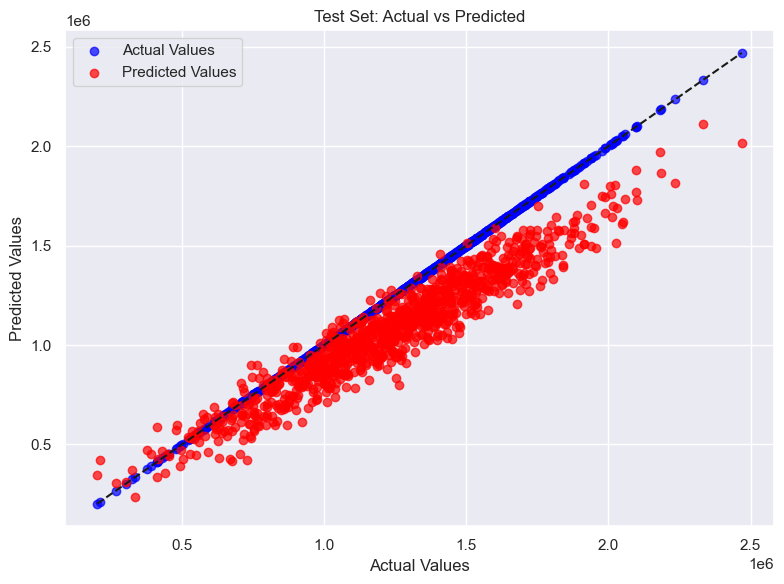

In [138]:
# Plot the MSE history
plt.plot(range(1, num + 1), MSE_hist)
plt.xlabel('Iterations Number')
plt.ylabel('MSE')
plt.title('MSE vs Iterations Number')
plt.show()

# Make predictions on the test set
Y_hat = np.dot(X_test, para)

import matplotlib.pyplot as plt

# Compare the prediction and actual value
Y_pred_test = np.dot(X_test, para)

# Test set plot
plt.figure(figsize=(8, 6))  # Adjusting the figure size for clarity
plt.scatter(Y_test, Y_test, alpha=0.7, color='blue', label='Actual Values')  # Actual values in blue
plt.scatter(Y_test, Y_pred_test, alpha=0.7, color='red', label='Predicted Values')  # Predicted values in red
plt.title("Test Set: Actual vs Predicted")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--')  # Diagonal line
plt.legend()  # Add a legend to distinguish between actual and predicted values

plt.tight_layout()
plt.show()